# Upsampling - Downsampling 

Testing the algorithms for 
* upsampling
* downsampling


In [86]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from sift import gaussian_kernel_1d, upsample_1d, upsample,downsample

## Gaussian kernel

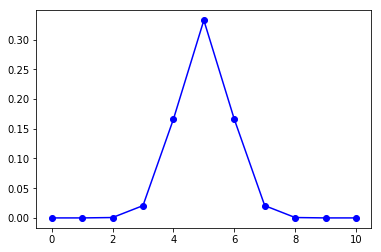

In [88]:
sigma = 1.2
Y = gaussian_kernel_1d(sigma)
plt.plot(Y,'bo-')

## Interpolation with linear kernel

In [89]:
def signal(x):
    return 3*x*np.sin(x)

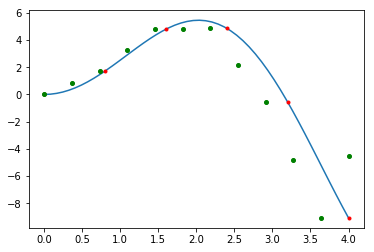

In [92]:
X = np.linspace(0,4)
Y = signal(X)
plt.plot(X,Y)

#points
L  = 6
points = np.linspace(0,4,L)
images = signal(points)
plt.plot(points,images,'ro',ms=3)

#upsampling
upsampled_2 = upsample_1d(images,factor=2)
plt.plot(np.linspace(0,4,2*L),upsampled_2,'go',ms=4)

In [13]:
# testing upsampling in images

In [93]:
from skimage.data import coffee

image shape is (400, 600, 3)


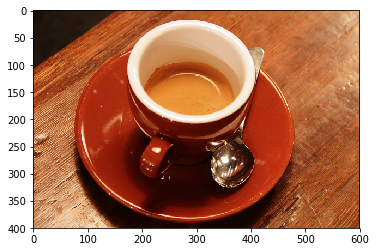

In [94]:
img = coffee()
print("image shape is {}".format(img.shape))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape now is : (800, 1200, 3)


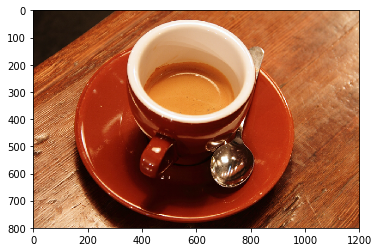

In [95]:
upsampled_coffee = upsample(img,2)
print("Shape now is :",upsampled_coffee.shape)
plt.imshow(upsampled_coffee)

## Down sampling

First thing, we need to test the gaussian operator to blur the image befor downscaling

In [96]:
sigma = 2.4
K = gaussian_kernel_1d(sigma)
K = np.outer(K,K)

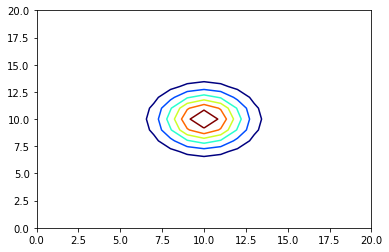

In [97]:
plt.contour(K,cmap=plt.cm.jet)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


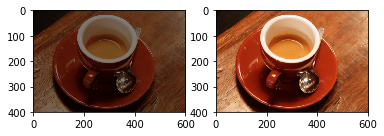

In [99]:
#blurring the image
from scipy.ndimage.filters import convolve
from skimage.filters import gaussian
blurred = convolve(img, K[:,:,np.newaxis])
fig, ax = plt.subplots(1,2)
sigma = 0.8

K = gaussian_kernel_1d(sigma)
K = np.outer(K,K)
blurred = convolve(img, K[:,:,np.newaxis])
blurred_2 = gaussian(img,sigma,multichannel=True)
ax[0].imshow(blurred)
ax[1].imshow(blurred_2)

## Down sampling

(67, 100, 3)


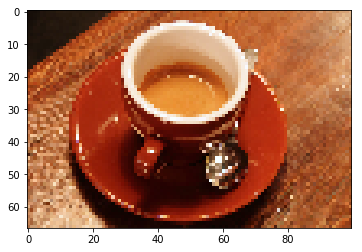

In [106]:
img_downsample = downsample(img,6)
print(img_downsample.shape)
plt.imshow(img_downsample)